In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Premise
\begin{equation*}
    y_n = \beta_0 + \beta_1 x_n + \epsilon_n
\end{equation*}
\begin{equation*}
    y_n = \beta^T \textbf{x}_n + \epsilon_n
\end{equation*}

In [5]:
# Generate data
N = 20
beta_0 = -4
beta_1 = 2

x = np.random.randn(N)

# Generate noise
e = np.random.randn(N)

# Generate predictions
y = beta_0 + beta_1 * x + e

# Generate true data
true_x = np.linspace(min(x), max(x), 100)
true_y = beta_0 + beta_1 * true_x

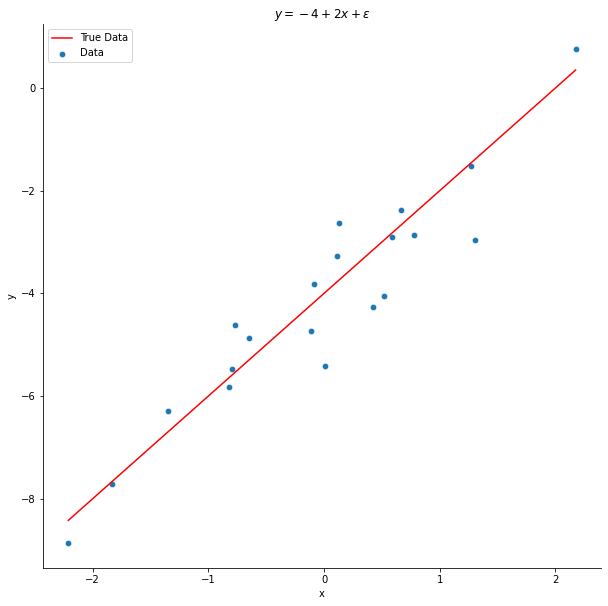

In [6]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x=x, y=y, ax=ax, s= 40, label = 'Data')
sns.lineplot(x=true_x, y=true_y, ax=ax, color='red', label = 'True Data')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title(fr"$y = {beta_0} + ${beta_1}$x + \epsilon$")
ax.legend()
sns.despine()

# Loss function - Residual sum of squares

\begin{equation*}
    \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2} \sum_{n=1}^N (y_n - \hat{y}_n)^2
\end{equation*} 
\begin{equation*}
    \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2} \sum_{n=1}^N (y_n - (\hat{\beta}_0 + \hat{\beta}_1x_n))^2
\end{equation*} 

# Parameter Estimation

## Take partial derivatives of the loss function w.r.t $\beta_0$

\begin{equation*}
    \frac{\partial \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1)}{\partial \hat{\beta}_0} = \frac{2}{2} \sum_{n=1}^N (0 - 1 - 0)(y_n - \hat{\beta}_0 - \hat{\beta}_1x_n)
\end{equation*}
\begin{equation*}
   0 = -1 (\sum_{n=1}^N y_n - \sum_{n=1}^N \hat{\beta}_0 - \hat{\beta}_1 \sum_{n=1}^N x_n)
\end{equation*}
\begin{equation*}
   0 = \sum_{n=1}^N y_n - \hat{\beta}_0 N - \hat{\beta}_1 \sum_{n=1}^N x_n
\end{equation*}
\begin{equation*}
   \hat{\beta}_0 N = \sum_{n=1}^N y_n - \hat{\beta}_1 \sum_{n=1}^N x_n
\end{equation*}
\begin{equation*}
   \hat{\beta}_0 = \frac{1}{N} (\sum_{n=1}^N y_n - \hat{\beta}_1 \sum_{n=1}^N x_n)
\end{equation*}
\begin{equation*}
    = \bar{y} - \hat{\beta}_1 \bar{x}
\end{equation*}


## Take partial derivatives of the loss function w.r.t $\beta_1$

\begin{equation*}
    \frac{\partial \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1)}{\partial \hat{\beta}_1} = \frac{2}{2} \sum_{n=1}^N (0 - 0 - x_n)(y_n - \hat{\beta}_0 - \hat{\beta}_1x_n)
\end{equation*}
\begin{equation*}
    0 = \sum_{n=1}^N x_n y_n - (\bar{y} - \hat{\beta}_1 \bar{x}) x_n - \hat{\beta}_1x_n^2
\end{equation*}
\begin{equation*}
    = \sum_{n=1}^N x_n y_n - \bar{y}x_n + \hat{\beta}_1 \bar{x} x_n - \hat{\beta}_1x_n^2
\end{equation*}
\begin{equation*}
    = \sum_{n=1}^N (x_n y_n - \bar{y}x_n) + \sum_{n=1}^N (\hat{\beta}_1 \bar{x} x_n - \hat{\beta}_1x_n^2)
\end{equation*}
\begin{equation*}
    = \sum_{n=1}^N ( x_ny_n - \bar{y}x_n) - \hat{\beta}_1 \sum_{n=1}^N (x_n^2 - \bar{x} x_n)
\end{equation*}
\begin{equation*}
  \hat{\beta}_1 \sum_{n=1}^N (x_n^2 - \bar{x} x_n)  = \sum_{n=1}^N ( x_ny_n - \bar{y}x_n)
\end{equation*}
\begin{equation*}
  \hat{\beta}_1   = \frac{\sum_{n=1}^N ( x_ny_n - \bar{y}x_n)}{\sum_{n=1}^N (x_n^2 - \bar{x} x_n)}
\end{equation*}
\begin{equation*}
  \hat{\beta}_1   = \frac{\sum_{n=1}^N x_n(y_n - \bar{y})}{\sum_{n=1}^N x_n(x_n - \bar{x})}
\end{equation*}
\begin{equation*}
  = \frac{\sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y})}{\sum_{n=1}^N (x_n - \bar{x})^2}
\end{equation*}


## Summing up
\begin{equation*}
  \hat{\beta}_0  = \bar{y} - \hat{\beta}_1 \bar{x}
\end{equation*}
\begin{equation*}
 \hat{\beta}_1 = \frac{\sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y})}{\sum_{n=1}^N (x_n - \bar{x})^2}
\end{equation*}


## Implementation

In [7]:
def mean(values):
    return sum(values) / len(values)

In [8]:
def variance(values):
    mu = mean(values)
    return sum([(x - mu) ** 2 for x in values])

In [9]:
def covariance(x, y):
    mu_x = mean(x)
    mu_y = mean(y)
    return sum([(x - mu_x) * (y - mu_y) for x, y in zip(x, y)])

In [10]:
def estimate_coefficients(x, y):
    beta_1 = covariance(x, y) / variance(x)
    beta_0 = mean(y) - beta_1 * mean(x)
    return beta_0, beta_1

## Testing out the model

In [11]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv"
)


In [12]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [32]:
X = data["Head Size(cm^3)"].values
y = data["Brain Weight(grams)"].values

In [21]:
y.shape

(237,)

In [14]:
beta_0, beta_1 = estimate_coefficients(X, y)

In [15]:
beta_0, beta_1

(325.57342104944223, 0.26342933948939945)

$$
    Brain Weight = 325.57342104944223 + 0.26342933948939945 * HeadSize
$$


In [16]:
# Predictions
y_hat = beta_0 + beta_1 * X

## Plotting the results


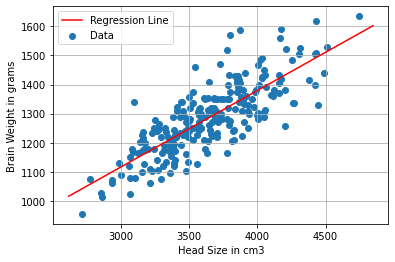

In [22]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

simulated_x = np.linspace(min_x, max_x, 1000)
simulated_y = beta_0 + beta_1 * simulated_x

plt.scatter(X, y, label = 'Data')
plt.plot(simulated_x, simulated_y, color = "red", label = 'Regression Line')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')

plt.legend()
plt.grid()
plt.show()

## Model Evaluation

In [23]:
def compute_rmse(y, y_hat):
    squared_error = np.power(y - y_hat, 2)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    return root_mean_squared_error

In [37]:
rmse_scratch = compute_rmse(y, y_hat)
rmse_scratch

72.1206213783709

In [25]:
def compute_r2(y, y_hat):
    
    sum_of_squared_errors = np.power(y - y_hat, 2).sum()
    
    y_mean = np.mean(y)
    total_sum_squares = np.power(y - y_mean, 2).sum()

    r2_score = 1 - (sum_of_squared_errors / total_sum_squares)
    return r2_score

In [38]:
r2_scratch = compute_r2(y, y_hat)
r2_scratch

0.639311719957

### Comparing with sklearn

In [33]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [35]:
regressor = LinearRegression()
regressor.fit(X, y)
y_hat = regressor.predict(X)

In [39]:
rmse_sk = np.sqrt(mean_squared_error(y, y_hat))
rmse_sk

72.1206213783709

In [41]:
r2_sk = r2_score(y, y_hat)
r2_sk

0.639311719957

In [43]:
assert rmse_sk == rmse_scratch
assert r2_sk == r2_scratch